In [25]:
import sys
import pandas as pd
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
import ternary
import numpy as np
import matplotlib.pyplot as plt

In [22]:

MCNT = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_NT.csv")
MCVI = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_VI.csv")
MCTF = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/MC_TF.csv")

We want to visualise a scatterplot of the wealth coordinates of the system after T days, from the same initial condition.

In [23]:
FinalCoordNT, FinalCoordVI, FinalCoordTF = [],[],[]

for i in range(len(MCNT.columns) - 1):
    value = MCNT['Rep%s' % i].iloc[-1]
    FinalCoordNT.append(value)
# print(FinalCoordNT)

for i in range(len(MCVI.columns) - 1):
    value = MCVI['Rep%s' % i].iloc[-1]
    FinalCoordVI.append(value)
# print(FinalCoordVI)

for i in range(len(MCTF.columns) - 1):
    value = MCTF['Rep%s' % i].iloc[-1]
    FinalCoordTF.append(value)
# print(FinalCoordTF)

print([np.mean(FinalCoordNT),np.mean(FinalCoordVI),np.mean(FinalCoordTF)])
print([np.std(FinalCoordNT),np.std(FinalCoordVI),np.std(FinalCoordTF)])

[49.49841934972876, 50.47144341116758, 0.030137239103659876]
[28.355195106155882, 28.34378138616625, 0.046302917149174096]


[(91, 0, 9), (53, 2, 45), (86, 10, 4), (77, 6, 17), (87, 11, 2), (82, 5, 13), (8, 46, 46), (40, 43, 17), (74, 22, 4), (69, 20, 11), (75, 19, 6), (33, 18, 49), (4, 5, 91), (75, 22, 3), (38, 26, 36), (37, 25, 38), (35, 58, 7), (11, 75, 14), (98, 0, 2), (66, 3, 31), (29, 5, 66), (44, 11, 45), (72, 8, 20), (36, 36, 28), (95, 2, 3), (10, 69, 21), (81, 9, 10), (50, 5, 45), (73, 13, 14), (33, 36, 31)]


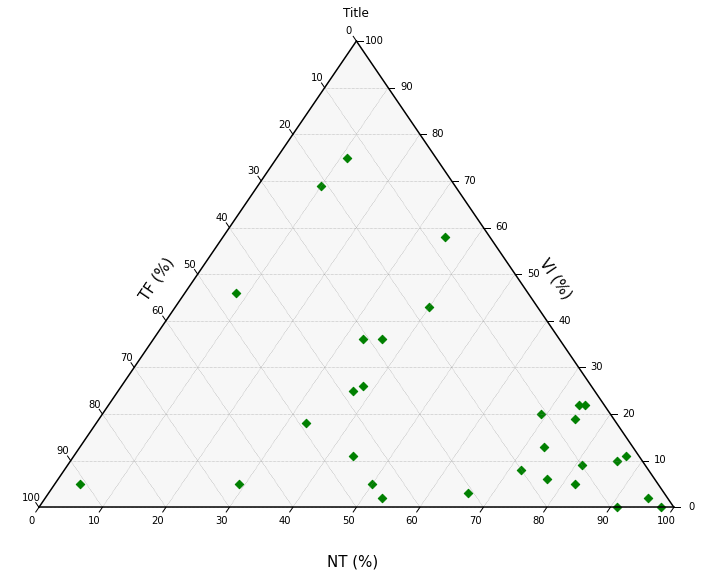

In [41]:
fontsize = 15
scale = 100

def random_points(num_points=30, scale=100):
    points = []
    for i in range(num_points):
        x = np.random.randint(1, scale)
        y = np.random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

points = random_points(30)
# points = list(np.array(points) * scale)
print(points)

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
tax.gridlines(color="gray", multiple=10)
tax.boundary()


tax.left_axis_label("TF (%)", fontsize = fontsize)
tax.right_axis_label("VI (%)", fontsize = fontsize)
tax.bottom_axis_label("NT (%)", fontsize = fontsize)


tax.scatter(points, marker='D', color='red', label="Green Diamonds")

ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tax.ticks(ticks = ticks, axis='lbr', linewidth=1, multiple=10)

tax.get_axes().axis('off')
# tax.clear_matplotlib_ticks()
tax.set_title('Title')
plt.tight_layout()
tax.show()
# tax._redraw_labels()